# <font color='dark'>**Classificação: Validação de modelos e métricas de avaliação**</h1>

### Projeto

Uma empresa de empréstimo de automóveis está passando por uma situação complicada, com alta demanda para uma frota reduzida de veículos e alto número de inadimplentes, trazendo um prejuízo grande para a empresa.

Nós fomos contratados para buscar melhorias na identificação de inadimplentes. A análise dos clientes atualmente é feita de forma manual, cliente por cliente, tomando muito tempo e ainda assim a detecção de inadimplentes é muito imprecisa.

Nossa tarefa é utilizar os dados fornecidos pela empresa para **classificar** os clientes em adimplentes e inadimplentes.

## <font color='dark'>Classificando dados</h1>

### Criando um modelo inicial

In [1]:
import pandas as pd


In [36]:
dados = pd.read_csv("emp_automovel.csv", sep=',')

In [4]:
dados.head()

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.0,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.0,0
1,9000.0,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.0,0
2,15750.0,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.0,0
3,9000.0,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.0,0
4,7650.0,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.0,0


In [6]:
x = dados.drop('inadimplente', axis=1)
y = dados['inadimplente']

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
modelo = DecisionTreeClassifier()
modelo.fit(x,y)
modelo.score(x,y)

1.0

In [13]:
print(f'Acurácia: {modelo.score(x, y)}')

Acurácia: 1.0


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x, x_teste, y, y_teste = train_test_split(x, y, test_size = 0.15, stratify = y, random_state = 5)
x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify = y, random_state = 5)

In [17]:
modelo.fit(x_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 1.0
Acurácia de validação: 0.8497517637836426


In [18]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(x_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 0.9205865272938444
Acurácia de validação: 0.9056702377841651


In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
y_previsto = modelo.predict(x_val)
matriz_confu = confusion_matrix(y_val, y_previsto)
print(matriz_confu)

[[10358   121]
 [  962    40]]


In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

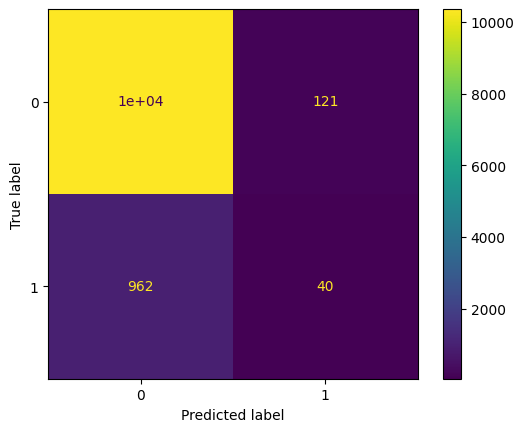

In [22]:
vizu = ConfusionMatrixDisplay(confusion_matrix = matriz_confu)
vizu.plot();

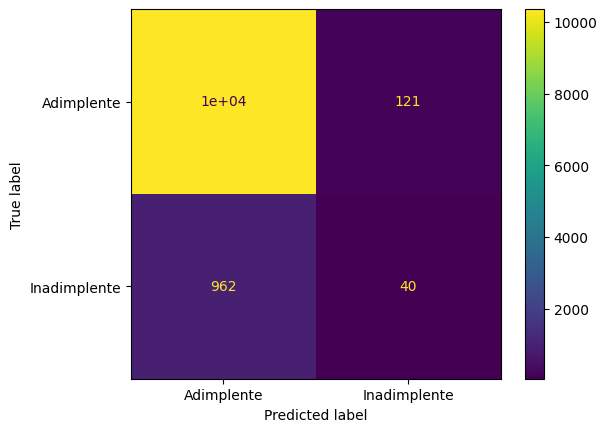

In [23]:
vizu = ConfusionMatrixDisplay(confusion_matrix = matriz_confu, display_labels=['Adimplente', 'Inadimplente'])
vizu.plot();

In [32]:
from sklearn.metrics import accuracy_score

In [42]:
print(f'Acurácia: {accuracy_score(y_val, y_previsto)}')


Acurácia: 0.9056702377841651


In [43]:
from sklearn.metrics import precision_score, recall_score

In [47]:
print(f'Precisão: {precision_score(y_val, y_previsto)}')
print(f'Recall: {recall_score(y_val, y_previsto)}')

Precisão: 0.2484472049689441
Recall: 0.03992015968063872


In [48]:
from sklearn.metrics import RocCurveDisplay

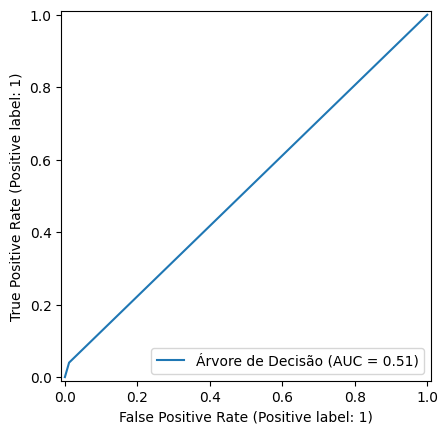

In [50]:
RocCurveDisplay.from_predictions(y_val, y_previsto, name= 'Árvore de Decisão');

In [51]:
from sklearn.metrics import roc_auc_score

In [52]:
roc_auc_score(y_val, y_previsto)

0.5141866281750841

In [53]:
from sklearn.metrics import PrecisionRecallDisplay

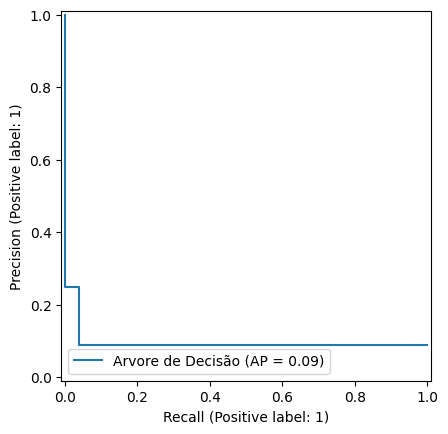

In [55]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name = 'Arvore de Decisão');

In [56]:
from sklearn.metrics import average_precision_score

In [57]:
average_precision_score(y_val, y_previsto)

0.09370866266856044

In [58]:
from  sklearn.metrics import classification_report


In [60]:
print(classification_report(y_val, y_previsto))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10479
           1       0.25      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.58      0.51      0.51     11481
weighted avg       0.86      0.91      0.87     11481

